In [70]:
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from src.models import Question, Answer, AnswerRelation
from src.main_util import load_questions, extract_features, build_df
print('Loading questions..')
questions = load_questions('./MCQ/')

Loading questions..


In [ ]:
print('Extracting features..')
extract_features(questions)

  0%|          | 7/5852 [00:00<01:43, 56.24it/s]

Extracting features..


 85%|████████▍ | 4953/5852 [01:27<00:15, 56.64it/s]

In [ ]:
df = build_df(questions)

In [ ]:
df['q_num_answers'].hist()

In [ ]:
df[['q_title_count']]

In [57]:
test_df = df[['q_text', 'q_average_frequency']]

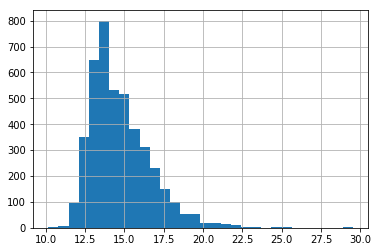

In [15]:
test_df[test_df['q_average_frequency'] > 0.1]['q_average_frequency'].hist(bins=30)